In [1]:
from AxonDeepSeg.qa.metrics_qa import MetricsQA

from pathlib import Path

In [2]:
morphometrics_file = "~/neuropoly/github/axondeepseg/tmp/Morphometrics.csv"

In [3]:
qa = MetricsQA(morphometrics_file)

In [4]:
qa.list_metrics()

gratio
axon_area (um^2)
axon_perimeter (um)
myelin_area (um^2)
axon_diam (um)
myelin_thickness (um)
axonmyelin_area (um^2)
axonmyelin_perimeter (um)
solidity
eccentricity
orientation


/Users/mathieuboudreau/neuropoly/github/axondeepseg/AxonDeepSeg/qa/metrics_qa.py:81: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


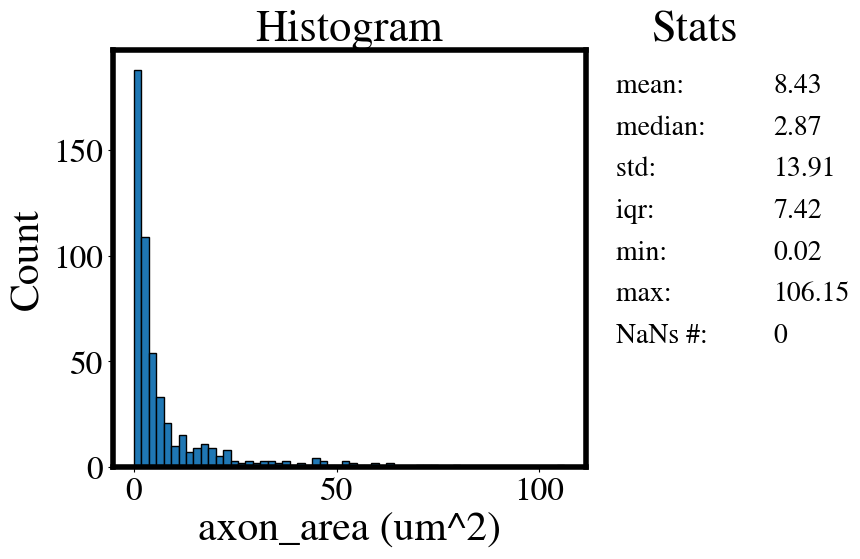

In [5]:
qa.plot('axon_area (um^2)')

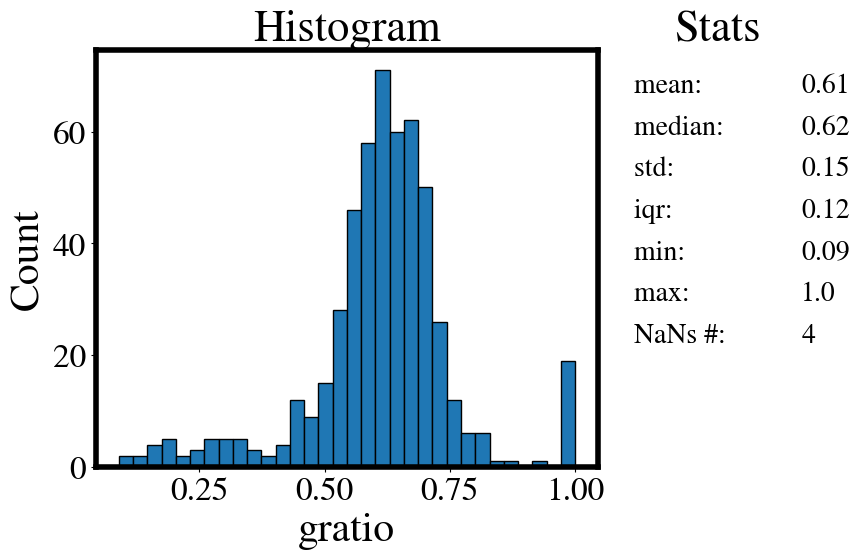

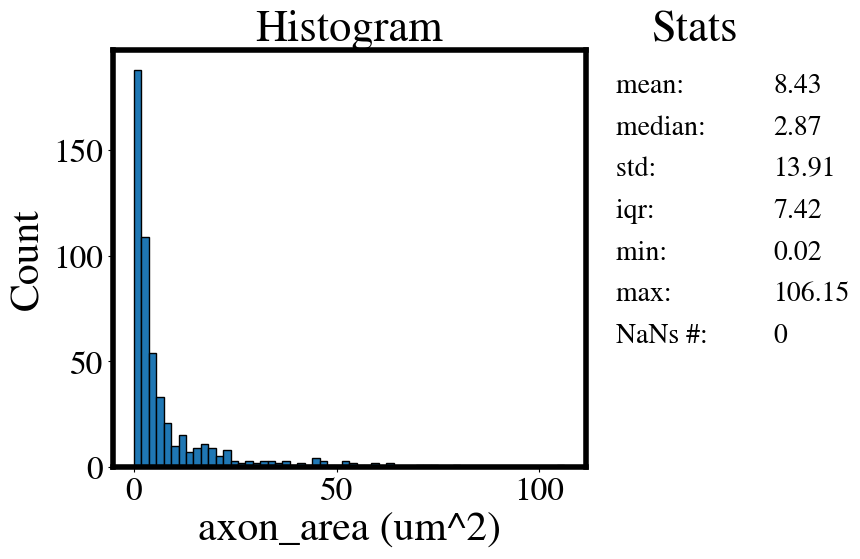

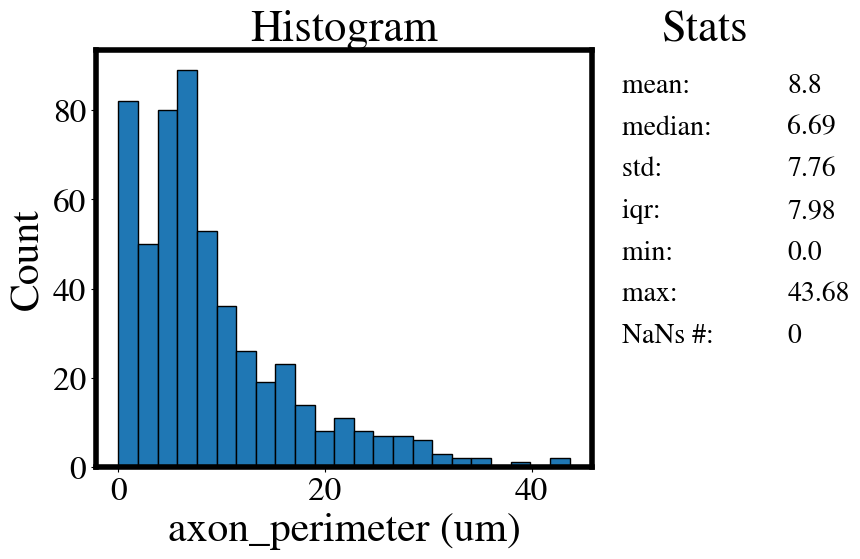

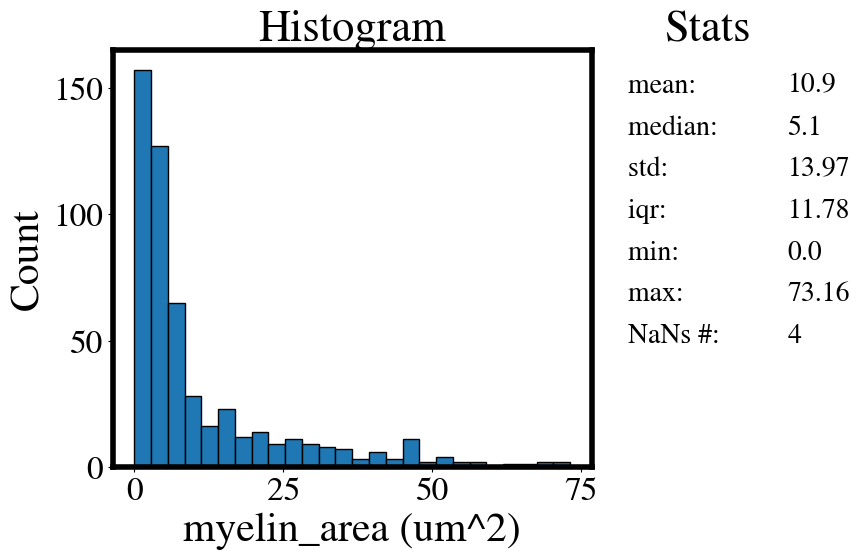

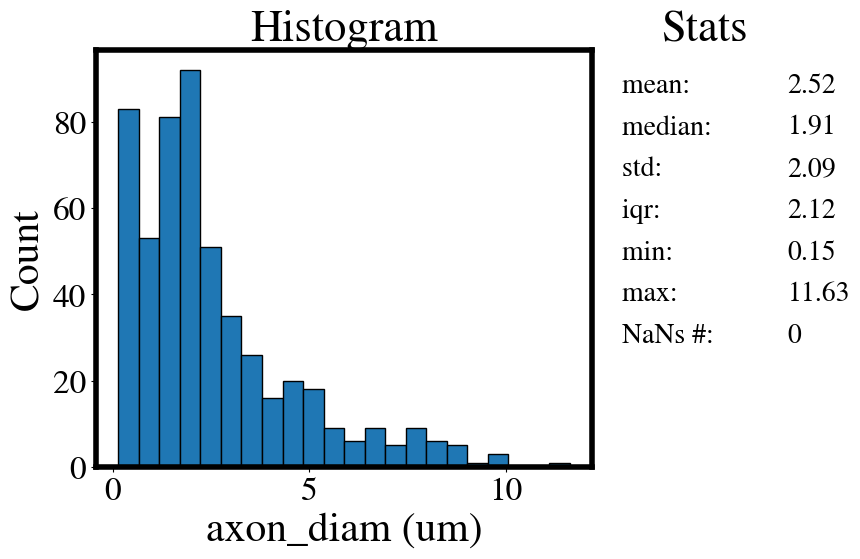

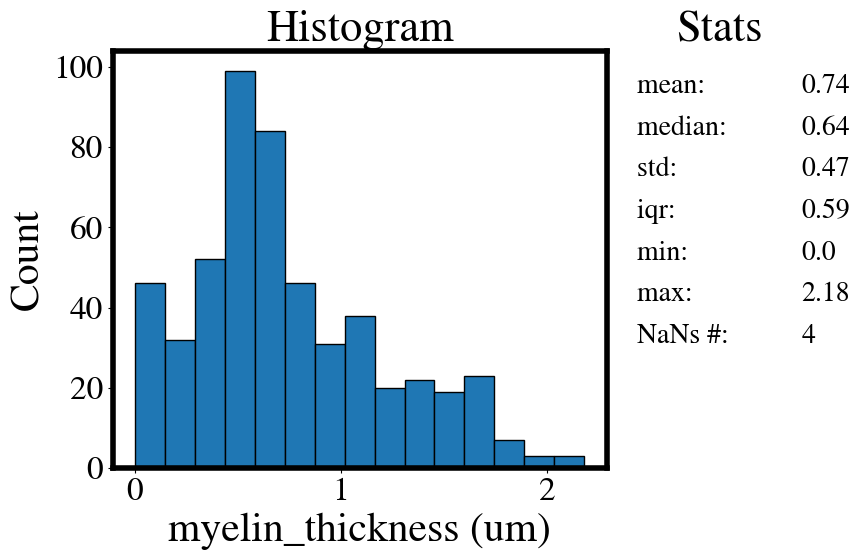

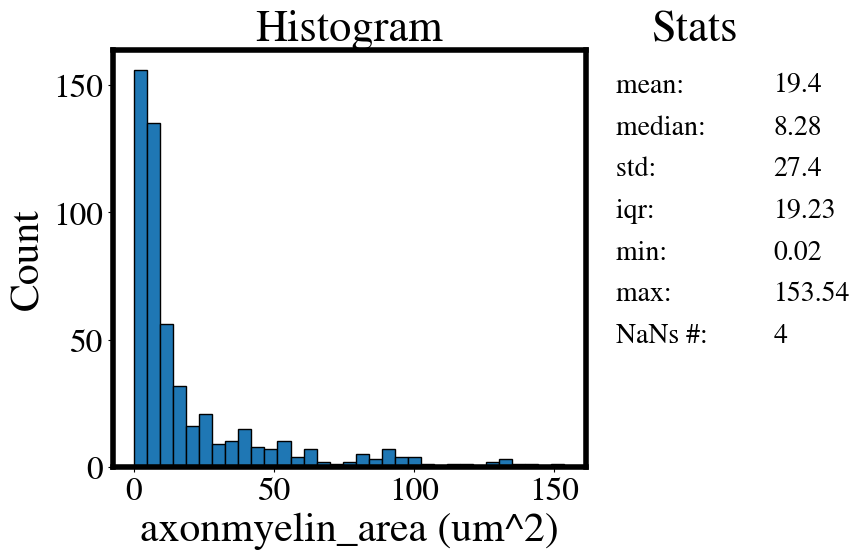

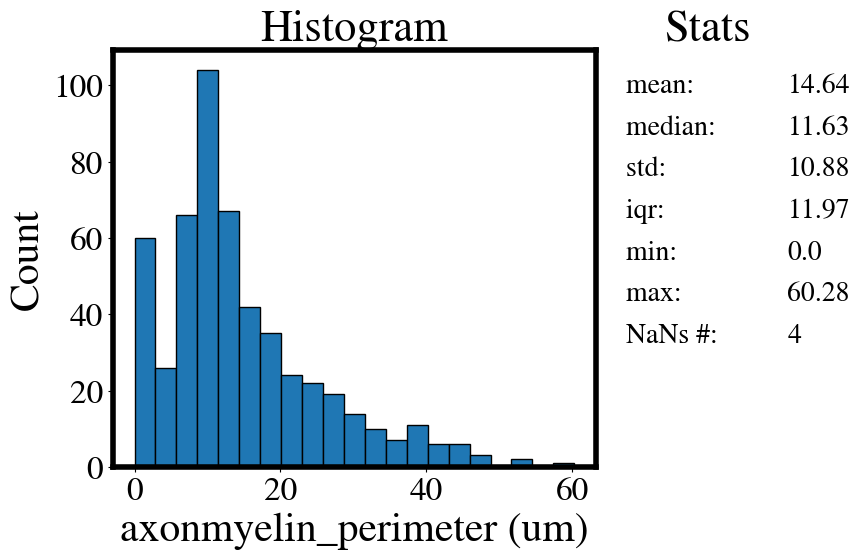

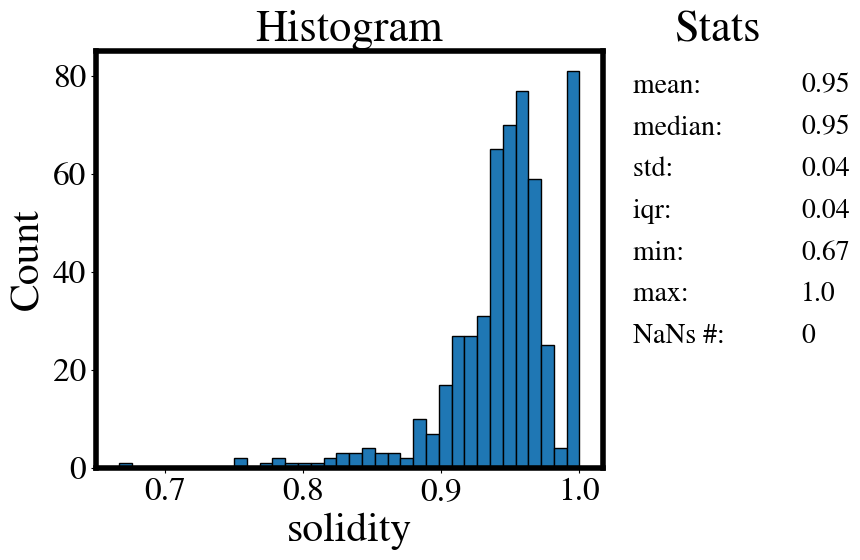

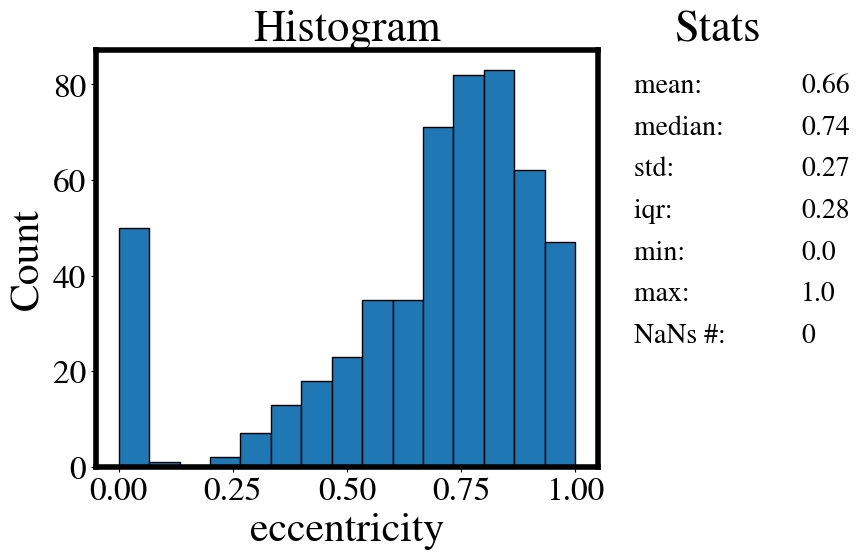

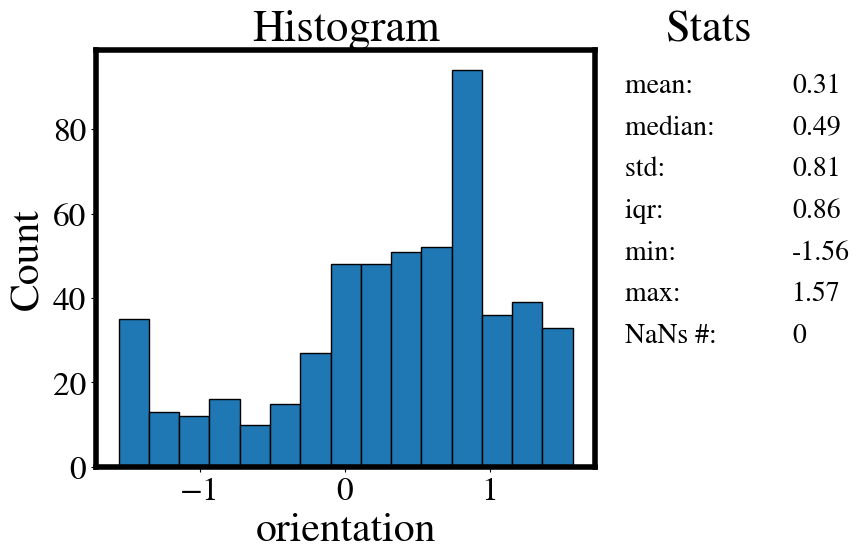

In [6]:
qa.plot_all()

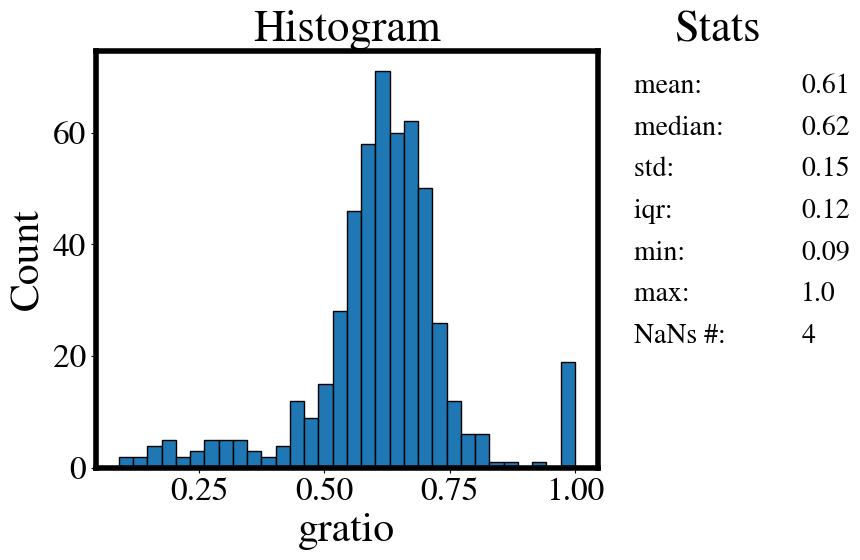

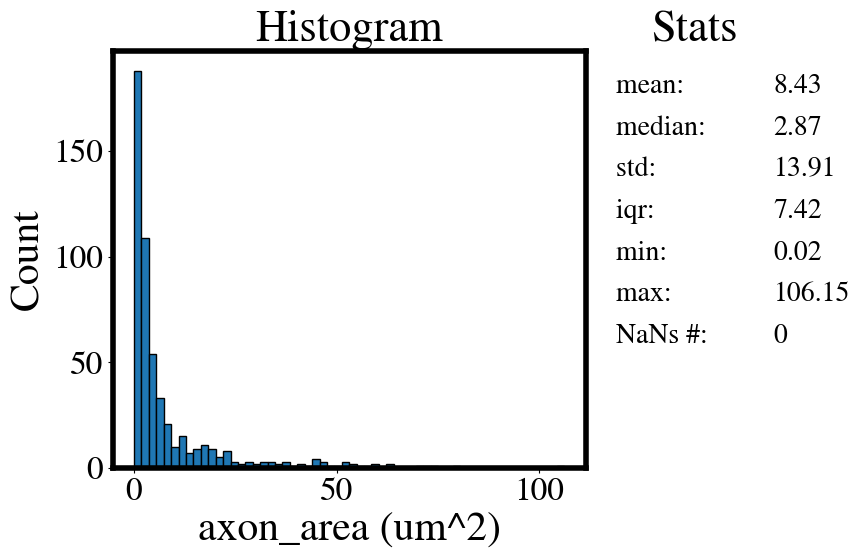

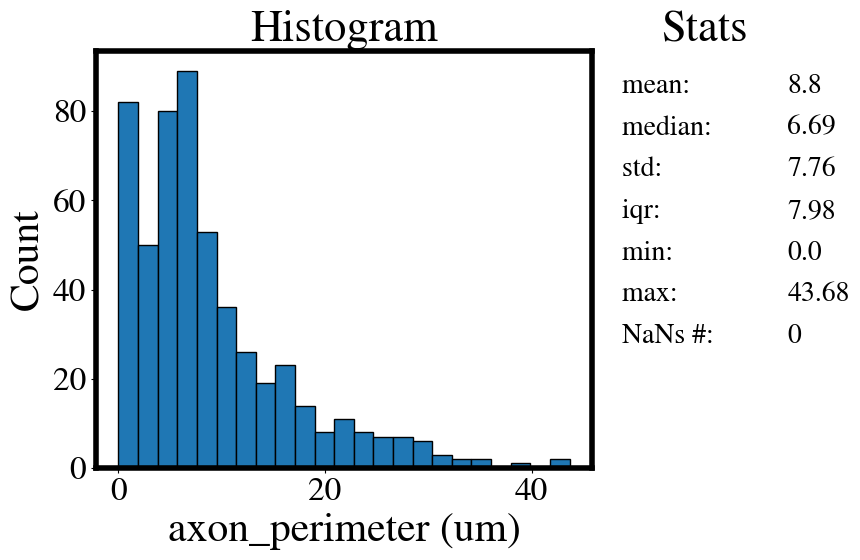

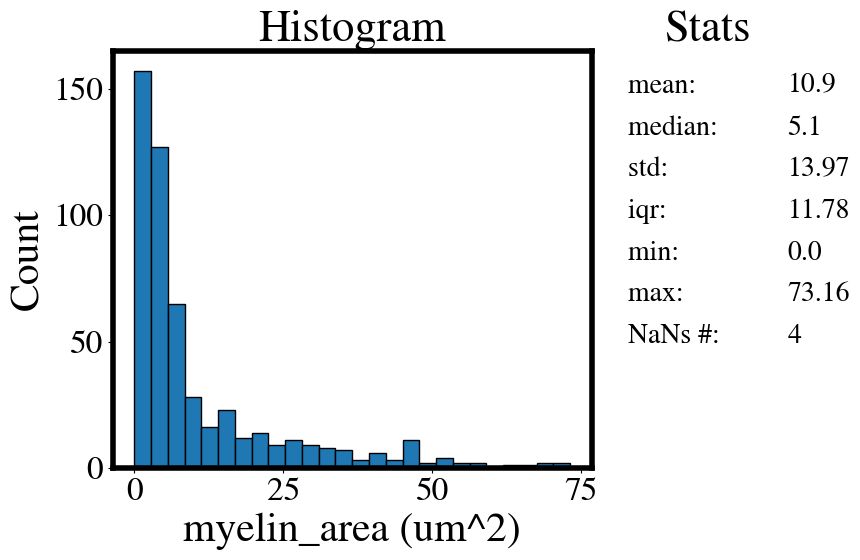

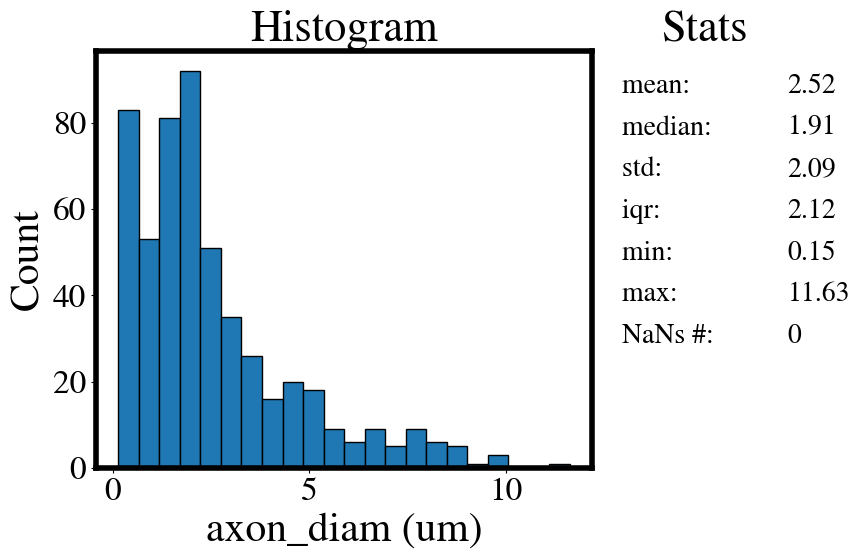

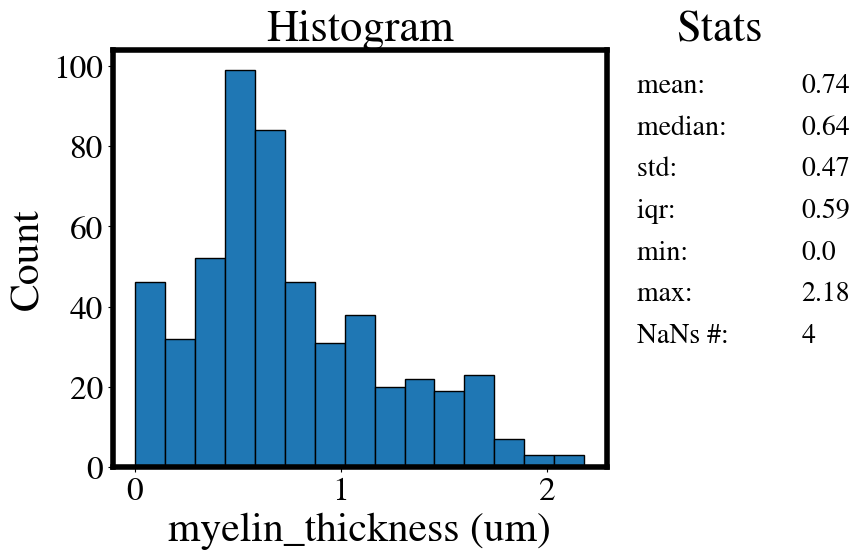

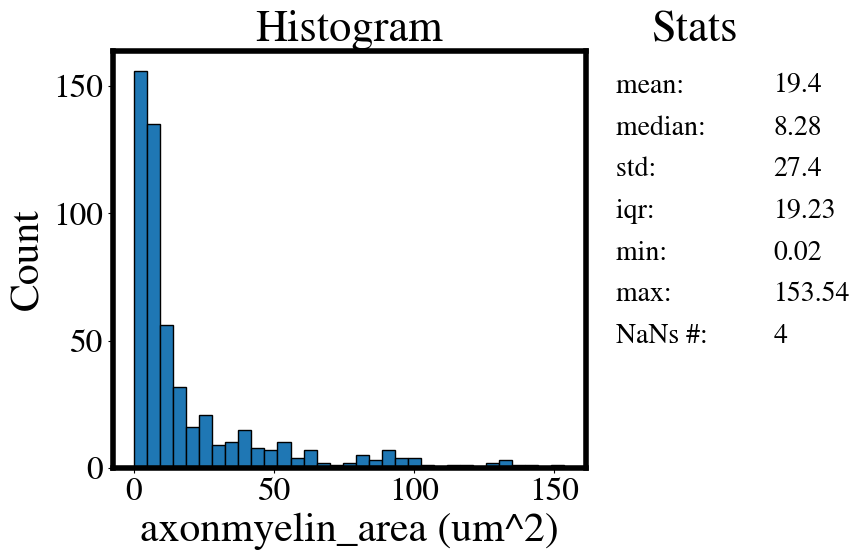

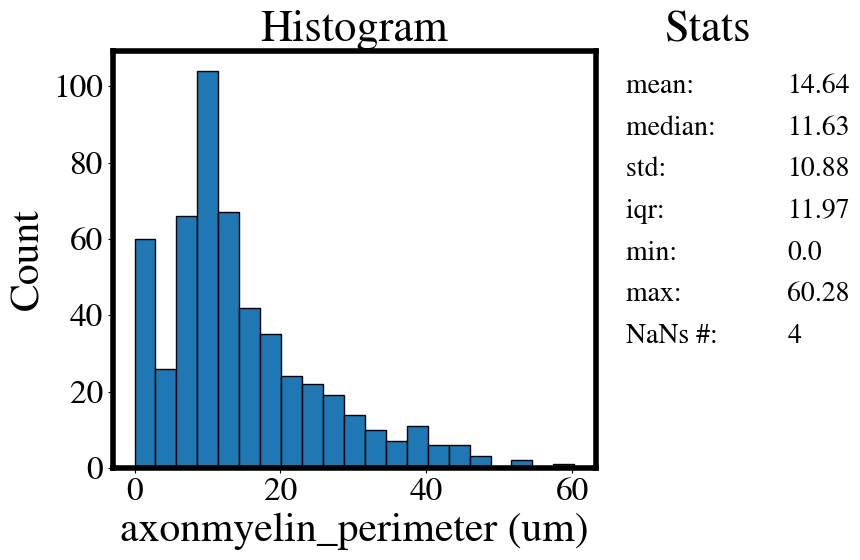

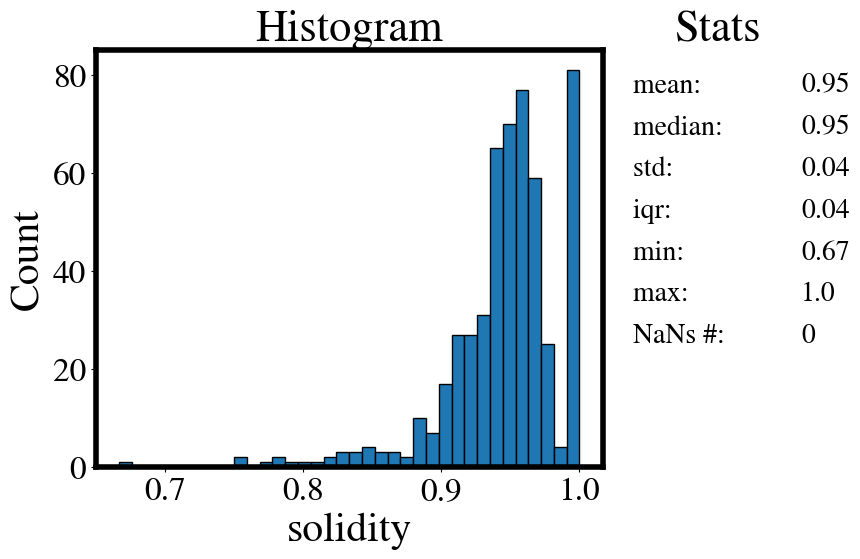

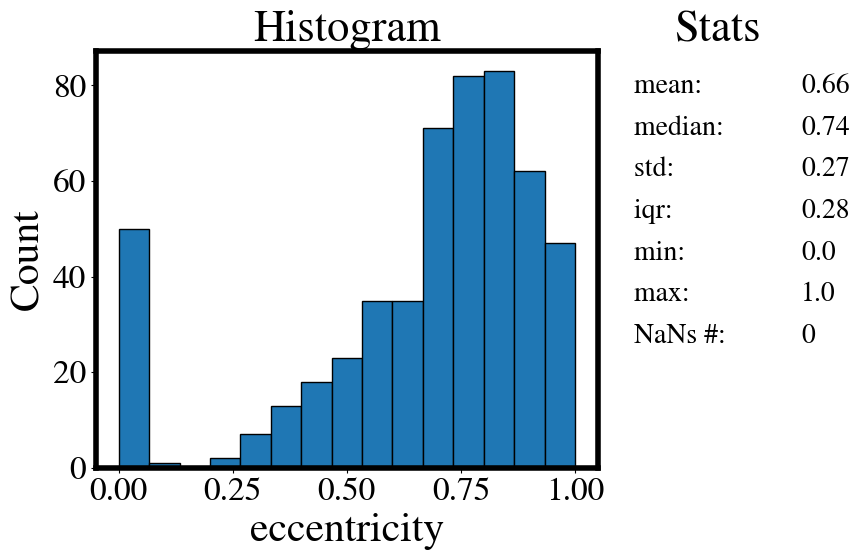

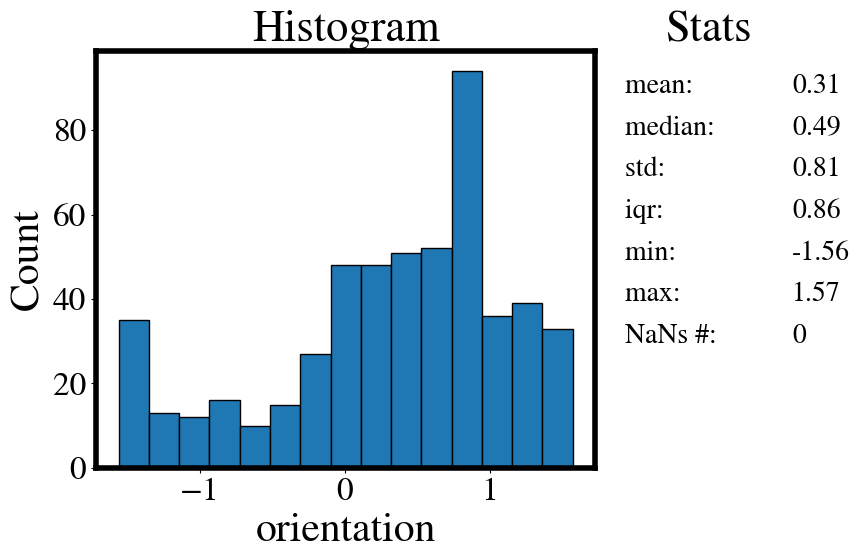

In [7]:
qa.plot_all("../../tmp")

In [8]:
from AxonDeepSeg.morphometrics.compute_morphometrics import get_axon_morphometrics
import AxonDeepSeg.ads_utils as ads
from pathlib import Path

axon_file = Path("/Users/mathieuboudreau/neuropoly/github/axondeepseg/AxonDeepSeg/models/model_seg_rat_axon-myelin_sem/data_test/image_seg-axon.png")
myelin_file = Path("/Users/mathieuboudreau/neuropoly/github/axondeepseg/AxonDeepSeg/models/model_seg_rat_axon-myelin_sem/data_test/image_seg-myelin.png")
pixel_file = Path("/Users/mathieuboudreau/neuropoly/github/axondeepseg/AxonDeepSeg/models/model_seg_rat_axon-myelin_sem/data_test/pixel_size_in_micrometer.txt")
folder = Path("/Users/mathieuboudreau/neuropoly/github/axondeepseg/AxonDeepSeg/models/model_seg_rat_axon-myelin_sem/data_test/")

axon_img = ads.imread(axon_file)
myelin_img = ads.imread(myelin_file)

morph_out = get_axon_morphometrics(
        axon_img, 
        path_folder=folder, 
        im_myelin=myelin_img, 
        pixel_size=pixel_file, 
        axon_shape="circle", 
        return_index_image=False, 
        return_border_info=False,
        return_instance_seg=True
    )

2024-01-14 13:34:10.572 | INFO     | AxonDeepSeg.visualization.colorization:colorize_instance_segmentation:102 - Colorizing 525 instances.
2024-01-14 13:34:14.057 | WARNING  | AxonDeepSeg.morphometrics.compute_morphometrics:warn_if_measures_are_unexpected:322 - WARNING: Axon 41 at [y:1141.6153846153845, x:48.15384615384615] and corresponding myelinated axon 41 have unexpected measure values for equivalent_diameter attribute.
2024-01-14 13:34:14.057 | WARNING  | AxonDeepSeg.morphometrics.compute_morphometrics:warn_if_measures_are_unexpected:322 - WARNING: Axon 41 at [y:1141.6153846153845, x:48.15384615384615] and corresponding myelinated axon 41 have unexpected measure values for area attribute.
2024-01-14 13:34:14.090 | WARNING  | AxonDeepSeg.morphometrics.compute_morphometrics:warn_if_measures_are_unexpected:322 - WARNING: Axon 61 at [y:832.0, x:81.0] and corresponding myelinated axon 61 have unexpected measure values for equivalent_diameter attribute.
2024-01-14 13:34:14.090 | WARNIN

In [9]:
print(morph_out[2])

ads.imwrite('instance_id.png', morph_out[2])

[[  1   1   1 ...   0   0   0]
 [  1   1   1 ...   0   0   0]
 [  1   1   1 ...   0   0   0]
 ...
 [512 512 512 ...   0   0   0]
 [512 512 512 ...   0   0   0]
 [512 512 512 ...   0   0   0]]


In [71]:
import pandas as pd
import numpy as np 

df = pd.read_csv(morphometrics_file)

flagged_objects = np.array([])
flagged_objects = np.append(flagged_objects, df.loc[df['gratio'] >=0.99].index.to_numpy())
flagged_objects = np.append(flagged_objects, df.loc[df['axon_area (um^2)'] <= min(df['axon_area (um^2)'])*5].index.to_numpy())
flagged_objects = np.append(flagged_objects, df.loc[df['myelin_area (um^2)'] <= min(df['myelin_area (um^2)'])*5].index.to_numpy())



In [72]:
print(np.array(flagged_objects))
flagged_objects = np.unique(flagged_objects)

[ 40.  60. 119. 165. 186. 198. 224. 225. 310. 319. 321. 431. 435. 442.
 466. 477. 482. 483. 507.  22.  25.  60.  61. 103. 104. 105. 106. 108.
 109. 111. 119. 123. 126. 186. 187. 191. 192. 198. 203. 207. 208. 209.
 212. 219. 221. 224. 225. 227. 230. 237. 305. 307. 308. 309. 310. 313.
 319. 320. 321. 334. 335. 336. 339. 342. 343. 346. 347. 371. 384. 430.
 431. 435. 436. 442. 445. 450. 455. 456. 457. 462. 466. 468. 472. 473.
 477. 479. 482. 483.  40.  60. 119. 165. 186. 198. 224. 225. 310. 319.
 321. 431. 435. 442. 466. 477. 482. 483. 507.]


In [68]:
print(df.loc[df['gratio'] >=0.99])
print(df.loc[df['axon_area (um^2)'] <= min(df['axon_area (um^2)'])*2])
print(df.loc[df['myelin_area (um^2)'] <= min(df['myelin_area (um^2)'])*2])


     Unnamed: 0      x0 (px)     y0 (px)  gratio  axon_area (um^2)  \
40           40  1141.615385   48.153846     1.0            0.2197   
60           60   832.000000   81.000000     1.0            0.0169   
119         119   973.000000  185.000000     1.0            0.0169   
165         165   333.400000  258.200000     1.0            0.0845   
186         186   535.666667  285.333333     1.0            0.0507   
198         198   334.000000  296.000000     1.0            0.0169   
224         224   522.000000  325.000000     1.0            0.0169   
225         225   524.000000  325.000000     1.0            0.0169   
310         310   726.000000  488.000000     1.0            0.0169   
319         319  1147.000000  496.000000     1.0            0.0169   
321         321  1144.000000  497.000000     1.0            0.0169   
431         431  1040.000000  636.000000     1.0            0.0169   
435         435   510.000000  638.000000     1.0            0.0169   
442         442   83

In [73]:
mask = np.zeros_like(morph_out[2])

# go through each element in arr
for id in flagged_objects:
    locations = np.where(np.isclose(morph_out[2], id+1))
    mask[locations] = 1
    

In [74]:
ads.imwrite('mask.png', mask)

In [57]:
print(mask)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
